LINEEAR ALGEBRA APPLICATION: LEAST SQUARES REGRESSION

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

First we applied the needed packages to read the data into a dataframe.

The we gathered/generated some informatiion from a dataset with some form of correlation and brought it into Python.

In [4]:
df1 = pd.read_excel(r'C:\VS-Python\LAB\Oblig\200_ok.xlsx')
print(df1)

     Konstant      Height     Weight  Number1  Number2  Number3
0           1  174.000000  70.000000        1        1        1
1           1  202.000000  99.000000        1        1        0
2           1  182.333333  82.000000        1        1        1
3           1  184.000000  75.000000        1        1        1
4           1  180.666667  80.333333        1        1        1
5           1  180.000000  59.000000        1        1        1
6           1  169.666667  71.000000        0        1        1
7           1  192.000000  81.000000        1        1        0
8           1  186.666667  74.000000        1        1        1
9           1  187.666667  85.000000        1        1        1
10          1  181.333333  73.666667        1        1        1
11          1  180.666667  68.000000        1        1        0
12          1  178.666667  61.666667        1        1        0
13          1  158.000000  44.000000        0        0        0
14          1  170.000000  69.000000    

Then we constructed a scatterplot to see the estimated covariance in the data. Here we used 'Height' as our x value and 'Weight' as our y value.

<AxesSubplot:xlabel='Height', ylabel='Weight'>

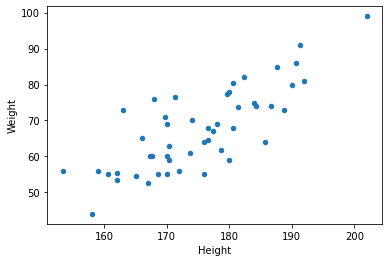

In [5]:
df1.plot.scatter(x="Height", y="Weight")

We define our x- and y-values as np arrays to make an array. Which is a grid of values so that we easily can gather data about our variables.

In [6]:
y = np.array(df1.Weight)
x = np.array(df1.Height)

Next we take our values and estimate the covariance and the variance. We used the built in covariance function np.cov.

In [7]:

var_x = np.var(x)
var_y = np.var(y)

cov_xy = np.cov([x,y])

cov_xy 

cov_xy = cov_xy[0,1]
cov_xy

93.23346560846562

From there we estimated our coefficients by dividing the covariance on the product of the two variables' standard deviations.

In [8]:
beta_1 = cov_xy/var_x
beta_0 = np.mean(y) - beta_1*np.mean(x)
print("beta_0: ", beta_0, "beta_1: ", beta_1 )

beta_0:  -89.35943286503009 beta_1:  0.8950553859445385


With these beta values we can now add them to create our fitted values as y_hat and put the m together with our scatterdata to see the least square regression model.

In [9]:
y_hat = beta_0 + beta_1*x

Text(0, 0.5, 'Weight')

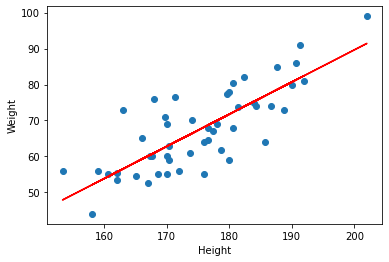

In [10]:
fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
ax.plot(x, y_hat, color="red")
ax.set_xlabel("Height")
ax.set_ylabel("Weight")

MATRIX ALGEBRA

We bring in the dataset and add a constant value.

In [11]:
df1 = df1.dropna(subset=['Height', 'Weight', 'Number1', 'Number2','Number3']).copy()

df1["Konstant"] = 1

y = np.array(df1.loc[:,'Height'])
X = np.array(df1.loc[:,['Konstant', 'Weight', 'Number1', 'Number2','Number3']])
X

array([[ 1.        , 70.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        , 99.        ,  1.        ,  1.        ,  0.        ],
       [ 1.        , 82.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        , 75.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        , 80.33333333,  1.        ,  1.        ,  1.        ],
       [ 1.        , 59.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        , 71.        ,  0.        ,  1.        ,  1.        ],
       [ 1.        , 81.        ,  1.        ,  1.        ,  0.        ],
       [ 1.        , 74.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        , 85.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        , 73.66666667,  1.        ,  1.        ,  1.        ],
       [ 1.        , 68.        ,  1.        ,  1.        ,  0.        ],
       [ 1.        , 61.66666667,  1.        ,  1.        ,  0.        ],
       [ 1.        , 44.        ,  0. 

Now we will do our matrix algebra calculations to get our estimated betas

In [12]:
betas = np.dot((np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)),y)
print(betas)

[135.53449406   0.51227336   7.39819848   1.45471912   0.382301  ]


We plot some of our results

In [13]:
y_hat2 = np.dot(X[:,0:3], betas[0:3])
y_hat2

array([178.79182744, 193.64775475, 184.9391077 , 181.35319422,
       184.08531878, 173.15682052, 171.90590231, 184.42683435,
       180.84092086, 186.47592777, 180.67016307, 177.76728073,
       174.52288281, 158.07452171, 170.8813556 , 164.22180198,
       174.80878466, 163.70952862, 182.54849871, 166.2708954 ,
       174.46726909, 164.22180198, 180.3286475 , 168.83226218,
       172.93044902, 163.70952862, 175.7181873 , 186.98820113,
       162.51422413, 165.75862204, 163.88028641, 175.20591395,
       162.8557397 , 176.05970287, 182.89001428, 180.84092086,
       163.70952862, 163.53877084, 163.70952862, 168.31998882,
       173.66909388, 174.18136724, 177.25500737, 177.76728073,
       189.54956791, 170.8813556 , 166.2708954 , 164.22180198,
       183.91456099])

Then we created fitted values of some of the regression lines

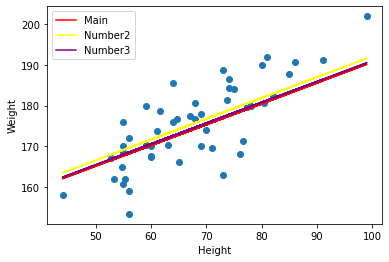

In [14]:
y_hat2 = betas[0] + betas[1]*X[:,1] + betas[2]*np.mean(X[:,2])
y_Number2 = betas[0] + betas[1]*X[:,1] + betas[2]*np.mean(X[:,2]) +  betas[3]
y_Number3 = betas[0] + betas[1]*X[:,1] + betas[2]*np.mean(X[:,2]) +  betas[4]

fig, ax = plt.subplots()
ax.scatter(x=X[:,1], y=y)
ax.plot(X[:,1], y_hat2, color="red", label="Main")
ax.plot(X[:,1], y_Number2, color="yellow", label="Number2")
ax.plot(X[:,1], y_Number3, color="purple", label="Number3")
ax.set_xlabel("Height")
ax.set_ylabel("Weight")
ax.legend()

We visualized the regressions.

The "Main" represented as the red line shows the actual regression line without any form of added controlling variables. 

Then we introduced an interaction term to model how two or more independent variables together impact the target variable.

Number 2 and Number 3 are dummy variables that would create new lines based on a variable related to the x- and y-variables that make up the "Main" line.

These could be made into varibles such as gender, occupation, religion and so on. We see that these variables make no large change in the "Main" line, but that all depends on the value introduced.

OLS regression

In [15]:
import statsmodels.formula.api as smf

sm_mod1 = smf.ols(formula = "Height ~ Weight + Number1 + Number2 + Number3", data=df1).fit()
sm_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     29.71
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           5.36e-12
Time:                        15:37:34   Log-Likelihood:                -151.30
No. Observations:                  49   AIC:                             312.6
Df Residuals:                      44   BIC:                             322.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    135.5345      5.626     24.092      0.000     124.197     146.872
Weight         0.5123      0.087      5.873      0.000       0.336       0.688
Number1        7.3982      2.125      3.482      0.001       3.116      11.681
Number2        1.4547      1.862      0.781      0.439      -2.298       5.207
Number3        0.3823      1.616      0.237      0.814      -2.875       3.640
==============================================================================
Omnibus:                        2.884   Durbin-Watson:                   2.364
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.871
Skew:                           0.370   Prob(JB):                        0.392
Kurtosis:                       3.607   Cond. No.                         493.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We see that the beta values from the manual walkthrough is the same as the OLS regression results through the Statsmodel package under "coef".

Adjusted r-squared at 70,5%. It identifies the percentage of variance in the target field that is explained by the input or inputs. It is realatively high and should work well as an identification for the variables.

Since our added varibales are "dummys" we might end up with multicollinearity which refers to a situation where a number of independent variables in a linear regression model are closely correlated to one another and it can lead to skewed results.

